In [1]:
import cv2
image=cv2.imread("images/angry.JPG")

In [20]:
cv2.imshow("img",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

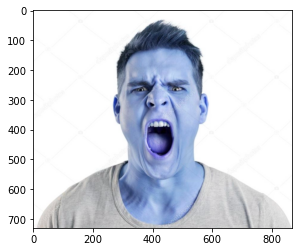

In [23]:
plt.imshow(image)

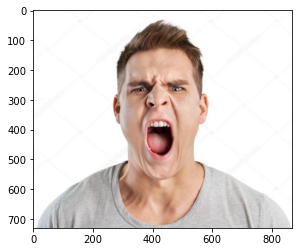

In [5]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [6]:
from utils.opv import OpvModel
mymodel2=OpvModel("face-detection-adas-0001",device="CPU",fp="FP32")

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)


In [7]:
predictions=mymodel2.Predict(image)

C:\ProgramData\Anaconda3\envs\Brain_AI\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
predictions

array([[[[0.        , 1.        , 0.9986755 , ..., 0.16281366,
          0.6463369 , 0.7761272 ],
         [0.        , 1.        , 0.01772273, ..., 0.40558317,
          0.5776891 , 0.46201316],
         [0.        , 1.        , 0.01708116, ..., 0.54557425,
          0.60485363, 0.7117546 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [8]:
mymodel1=OpvModel("emotions-recognition-retail-0003",device="CPU",fp="FP32")

C:\ProgramData\Anaconda3\envs\Brain_AI\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)


In [9]:
def EmotionBoxes(predictions):
    emotions={
        0:"neutral",
        1:"happy",
        2:"sad",
        3:"surprise",
        4:"anger"
    }
    emotions_people=emotions[np.argmax(predictions[1,2,1,1])]
    return emotions_people,max(predictions[0,:,0,0])

C:\ProgramData\Anaconda3\envs\Brain_AI\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
def DrawBoundingBoxes(predictions, image, conf=0.8):
    mymodel1=OpvModel("",device="CPU",fp="FP32")
    
    canvas=image.copy()
    predictions_1=predictions[0][0] # numpy array 타입
    confidence=predictions_1[:,2]   # 2번 데이터만
    topresults=predictions_1[(confidence>conf)]  # conf 보다 큰 데이터만
    (h,w)=canvas.shape[:2]
    for detection in topresults:
        box=detection[3:7]*np.array([w,h,w,h])
        (xmin,ymin,xmax,ymax)=box.astype("int")
        img=canvas[ymin:ymax,xmin:xmax].copy()
        
        predictions_emo=mymodel1.Predict(img)
        emo,max_emo_val=EmotionBoxes(predictions_emo)
        
        cv2.rectangle(canvas,(xmin,ymin),(xmax,ymax),(0,0,255),4)
        cv2.putText(canvas,emo+" "+str(round(max_emo_val*100,1))+"%",(xmin,ymin),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,0,0),2)
    cv2.putText(canvas,str(len(topresults))+" face(s) detected",(50,50),cv2.FONT_HERSHEY_SIMPLEX,0.6,(255,0,0),2)
    
    return canvas

C:\ProgramData\Anaconda3\envs\Brain_AI\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
cv2.imshow("canvas",DrawBoundingBoxes(predictions,image))
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\ProgramData\Anaconda3\envs\Brain_AI\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'predictions' is not defined

## 영상에서 얼굴 표정 인식하기

In [11]:
camera=cv2.VideoCapture(0)
while True:
    ret,frame=camera.read()
    mymodel2=OpvModel("face-detection-adas-0001",device="CPU",fp="FP32")
    predictions=mymodel2.Predict(frame)
    canvas=DrawBoundingBoxes(predictions,frame)
    cv2.imshow("camera",canvas)
    if cv2.waitKey(1) & 0xFF==27:
        break
camera.release()
cv2.destroyAllWindows()

C:\ProgramData\Anaconda3\envs\Brain_AI\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWar

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 

C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: IEPlugin class is deprecated. Please use IECore class instead.
  plugin = IEPlugin(device=device)
C:\Intel_JS\openVINO\utils\opv.py:61: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model=model_xml, weights=model_bin)
C:\Intel_JS\openVINO\utils\opv.py:65: DeprecationWarning: 